<a href="https://colab.research.google.com/github/eunikehp/RevoU/blob/main/Game_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
sheet_url = 'https://docs.google.com/spreadsheets/d/10poofg-l8DMdtUgGy8mOpra2IHmA9EQC7drmF9AyYHA/edit#gid=1485085913'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
sheet_url_trf
df = pd.read_csv(sheet_url_trf)

In [3]:
# data inspection 
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [4]:
df.shape

(177, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [6]:
# change dataypes
df['Release'] = pd.to_datetime(df['Release']) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       177 non-null    object        
 1   Sales      177 non-null    float64       
 2   Series     141 non-null    object        
 3   Release    177 non-null    datetime64[ns]
 4   Genre      177 non-null    object        
 5   Developer  177 non-null    object        
 6   Publisher  177 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.8+ KB


In [8]:
#check null
df.isnull().sum()

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

In [9]:
df['Publisher'].unique()

array(['Krafton', 'Mojang Studios', 'Blizzard Entertainment', 'Valve',
       'Re-Logic', 'Valve\xa0(digital)', 'CD Projekt', 'Electronic Arts',
       'Devolver Digital', 'Atari, Inc.\xa0(Windows)',
       'Sierra Entertainment', 'Facepunch Studios',
       '2K Games\xa0&\xa0Aspyr', 'SCS Software', 'NCsoft',
       'Coffee Stain Publishing', 'Bohemia Interactive', 'Activision',
       'Paradox Interactive', 'Endnight Games', 'MicroProse Software',
       'THQ', 'Broderbund', 'Namco Bandai Games',
       'Bandai Namco Entertainment', 'Microsoft', 'Virgin Interactive',
       'Sony Online Entertainment', 'Square Enix',
       'Blizzard Entertainment\xa0(North America)', 'Bandai Namco Games',
       'Sierra On-Line', 'Sierra Studios', 'Wube Software',
       'Impressions Game', 'Brøderbund', 'Eidos Interactive',
       'The Fun Pimps', 'Sunflowers', 'Interplay Entertainment',
       'EA Games', 'Infogrames', 'CDV Software',
       'Electronic Arts\xa0(retail)', 'id Software', 'GT Interac

In [10]:
df['Publisher'].value_counts()

Electronic Arts           19
Blizzard Entertainment    10
Paradox Interactive        7
Activision                 6
GT Interactive             5
                          ..
Landfall Games             1
Headup Games               1
Atari, Inc                 1
Konami                     1
Blue Fang Games            1
Name: Publisher, Length: 96, dtype: int64

In [11]:
dict_typo = { 'Valve\xa0(digital)': 'Valve',
                'Atari, Inc.\xa0(Windows)': 'Atari, Inc.',
                'Blizzard Entertainment\xa0(North America)': 'Blizzard Entertainment',
             'Electronic Arts\xa0(retail)': 'Electronic Arts',
             'Electronic Arts\xa0(Windows)': 'Electronic Arts',
             'Take-Two Interactive\xa0/\xa0Gathering of Developers': 'Take-Two Interactive',
             'ConcernedApe[f]':'ConcernedApe',
             'Infogrames\xa0/\xa0Atari':'Infogrames',
             '2K Games\xa0&\xa0Aspyr':'2K Games',
            'Atari, Inc': 'Atari, Inc.',
             'Namco Bandai Games':'Bandai Namco Entertainment',
             'Bandai Namco Games':'Bandai Namco Entertainment',
             'Softstar':'Softstar Entertainment',
             'Sierra On-Line': 'Sierra Entertainment',
             'Sierra Online': 'Sierra Entertainment',
             'Sierra Studios': 'Sierra Entertainment',
             'GT Interactive Software':'GT Interactive',
             'Brøderbund':'Broderbund'
             }
df_cleaned = df.replace(dict_typo)

In [12]:
df_cleaned['Publisher'].value_counts()

Electronic Arts           21
Blizzard Entertainment    12
Paradox Interactive        7
Sierra Entertainment       6
Activision                 6
                          ..
Konami                     1
Epyx                       1
Sega                       1
Warhorse Studios           1
Blue Fang Games            1
Name: Publisher, Length: 80, dtype: int64

In [13]:
df_cleaned['Publisher'].unique()

array(['Krafton', 'Mojang Studios', 'Blizzard Entertainment', 'Valve',
       'Re-Logic', 'CD Projekt', 'Electronic Arts', 'Devolver Digital',
       'Atari, Inc.', 'Sierra Entertainment', 'Facepunch Studios',
       '2K Games', 'SCS Software', 'NCsoft', 'Coffee Stain Publishing',
       'Bohemia Interactive', 'Activision', 'Paradox Interactive',
       'Endnight Games', 'MicroProse Software', 'THQ', 'Broderbund',
       'Bandai Namco Entertainment', 'Microsoft', 'Virgin Interactive',
       'Sony Online Entertainment', 'Square Enix', 'Wube Software',
       'Impressions Game', 'Eidos Interactive', 'The Fun Pimps',
       'Sunflowers', 'Interplay Entertainment', 'EA Games', 'Infogrames',
       'CDV Software', 'id Software', 'GT Interactive', 'Ubisoft',
       'Rockstar Games', 'Gathering of Developers',
       'Frontier Developments', 'Keen Software House', 'Landfall Games',
       'Take-Two Interactive', 'Headup Games', 'Konami', 'Epyx', 'Sega',
       'Capcom', 'Warhorse Studios', '

# EDA 

## 1. Which game is the oldest and the newest games?


In [14]:
sort_by_date = df.groupby('Release', as_index=False)['Name'].sum()
sort_by_date.head()

,Release,Name
0,1984-12-01,Hydlide
1,1985-06-01,Where in the World Is Carmen Sandiego?
2,1985-11-01,International Karate
3,1988-01-01,Tetris
4,1988-08-01,Last Ninja 2


In [15]:
sort_by_date.tail()

,Release,Name
125,2019-04-01,Mordhau
126,2020-08-01,Fall Guys
127,2020-09-01,Crusader Kings III
128,2020-12-01,Cyberpunk 2077
129,2021-02-01,Valheim


## 2. Which publisher published most of the games?

In [28]:
sort_by_publisher = df_cleaned.groupby('Publisher', as_index=False)['Name'].nunique().sort_values('Name',ascending=False)[0:5]
sort_by_publisher.head()

,Publisher,Name
23,Electronic Arts,21
5,Blizzard Entertainment,10
52,Paradox Interactive,7
1,Activision,6
57,Sierra Entertainment,6


Text(0.5, 0, 'Number of Games')

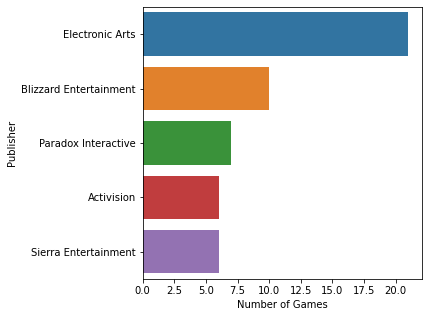

In [32]:
plt.rcParams["figure.figsize"] = (5,5)
sns.barplot(x='Name',y='Publisher', data= sort_by_publisher)
plt.xlabel('Number of Games')

##3. Which developer developed most of the games?


In [19]:
df_cleaned['Developer'].unique()

array(['PUBG Studios', 'Mojang Studios', 'Blizzard Entertainment',
       'Facepunch Studios', 'Re-Logic', 'Valve', 'CD Projekt Red',
       'Maxis', 'Mediatonic', 'Frontier Developments', 'Firaxis Games',
       'SCS Software', 'ArenaNet', 'Iron Gate', 'Bohemia Interactive',
       'System 3', 'Colossal Order', 'Endnight Games', 'Blizzard North',
       'Bullfrog Productions', 'Chris Sawyer', 'Relic Entertainment',
       'Broderbund', 'FromSoftware', 'Ensemble Studios',
       'Westwood Studios', 'Crytek', 'Verant Interactive',
       'Dontnod Entertainment', 'Impressions Game', 'Wube Software',
       'Cyan', 'Square', 'The Fun Pimps', 'Max Design', 'BioWare',
       'EA DICE', 'Lionhead Studios', 'GSC Game World', 'id Software',
       'Rockstar North', 'Illusion Softworks', 'Arrowhead Game Studios',
       'Ubisoft', 'Electronic Arts', 'Keen Software House',
       'Landfall Games', 'Firefly Studios',
       'Edmund McMillen\xa0& Florian Himsl', 'Kojima Productions', 'Sega',
     

In [20]:
df_cleaned['Developer'].value_counts()

Blizzard Entertainment             10
Maxis                               6
Paradox Development Studio          5
Ensemble Studios                    4
id Software                         4
                                   ..
Kojima Productions                  1
Edmund McMillen & Florian Himsl     1
Landfall Games                      1
Keen Software House                 1
Microsoft                           1
Name: Developer, Length: 108, dtype: int64

In [21]:
sort_by_developer = df_cleaned.groupby('Developer', as_index=False)['Name'].nunique().sort_values('Name',ascending = False)[0:5]
sort_by_developer.head()

,Developer,Name
7,Blizzard Entertainment,8
61,Maxis,6
70,Paradox Development Studio,5
107,id Software,4
101,Valve,4


Text(0.5, 0, 'Number of Games')

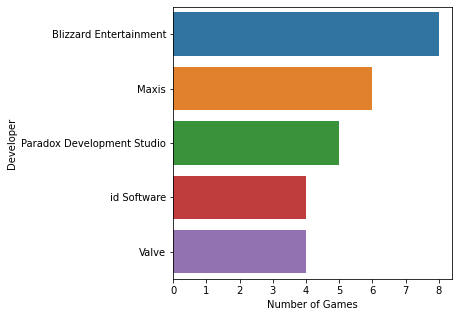

In [29]:
plt.rcParams["figure.figsize"] = (5,5)
sns.barplot(x='Name',y='Developer', data= sort_by_developer)
plt.xlabel('Number of Games')

## 4. Which series is the most sales?

In [23]:
sales_by_series = df.groupby('Series', as_index=False)['Sales'].sum().sort_values('Sales',ascending = False)[0:5]
sales_by_series.head()

,Series,Sales
47,Minecraft,33.0
22,Diablo,26.0
75,The Sims,24.0
36,Half-Life,21.0
68,StarCraft,21.0


Text(0.5, 0, 'Total Sales(in millions)')

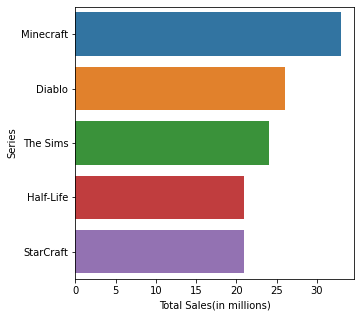

In [30]:
plt.rcParams["figure.figsize"] = (5,5)
sns.barplot(x='Sales',y='Series', data= sales_by_series)
plt.xlabel('Total Sales(in millions)')

## 5. Which series have the most games?


In [25]:
sort_by_series = df.groupby('Series', as_index=False)['Name'].nunique().sort_values('Name',ascending = False)[0:5]
sort_by_series.head()

,Series,Name
13,Command & Conquer,5
68,StarCraft,4
2,Age of Empires,4
12,Civilization,4
20,Dark Souls,3


Text(0.5, 0, 'Number of Games')

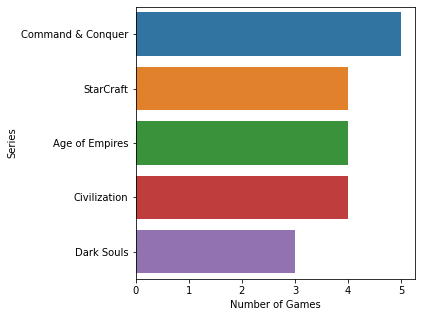

In [31]:
plt.rcParams["figure.figsize"] = (5,5)
sns.barplot(x='Name',y='Series', data= sort_by_series)
plt.xlabel('Number of Games')